In [98]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score


In [20]:
df = pd.read_csv('E:\\Datasets\\Social_Network_Ads.csv')

In [21]:
df = df.drop(columns=['Gender','User ID'])



In [16]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [46]:
# x input and y input for traintest split

x = df.iloc[:,0:2]

y = df.iloc[:,-1]

In [45]:
# performing train test split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2,random_state=2)

In [27]:
x_train.shape,x_test.shape

((320, 2), (80, 2))

In [29]:
sc = StandardScaler()

In [32]:
# fit the scaler to the train set, it will learn the parameters
# transform the data

x_train_scaled = sc.fit_transform(x_train)

In [34]:
x_test_scaled = sc.transform(x_test)

In [40]:
# skleran gives the output in numy array form so iwe convert the scaled data into a DataFrame

x_train_scaled = pd.DataFrame(x_train_scaled,columns = x_train.columns)

x_test_scaled = pd.DataFrame(x_test_scaled,columns = x_test.columns)

In [41]:
x_test_scaled

,Age,EstimatedSalary
0,-0.848263,0.402181
1,-1.620508,-1.573252
2,-0.076018,-0.482341
3,-0.848263,0.166309
4,1.565002,0.018888
...,...,...
75,-0.269079,0.077856
76,2.144186,0.962379
77,-1.330916,-0.334921
78,1.661533,1.640513


<AxesSubplot:xlabel='Age', ylabel='Density'>

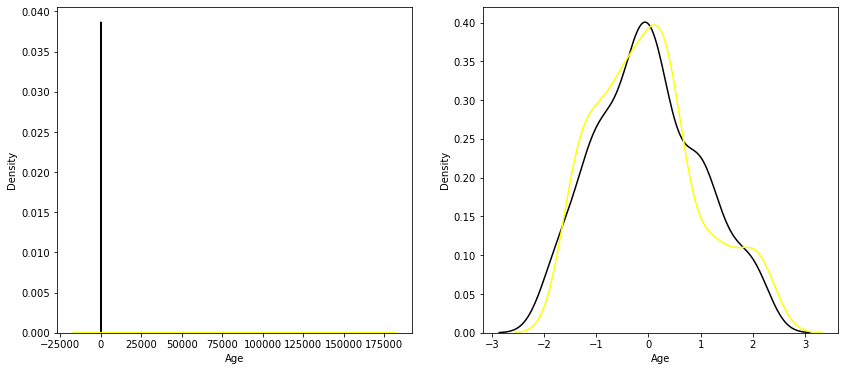

In [57]:
fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize=(14,6))

sns.kdeplot(x_train['Age'],color='black',ax=ax1)

sns.kdeplot(x_train['EstimatedSalary'],color='yellow',ax=ax1)


sns.kdeplot(x_train_scaled['Age'],color='black',ax=ax2)

sns.kdeplot(x_train_scaled['EstimatedSalary'],color='yellow',ax=ax2)







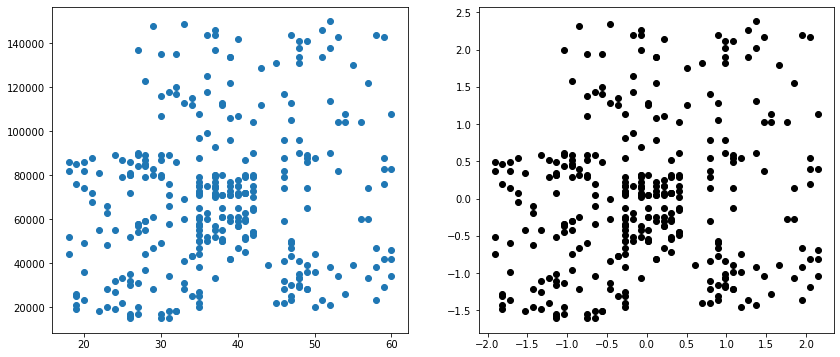

In [63]:
fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize=(14,6))

ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])

ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='black')


## Comparison of distribuitons

<AxesSubplot:xlabel='Age', ylabel='Density'>

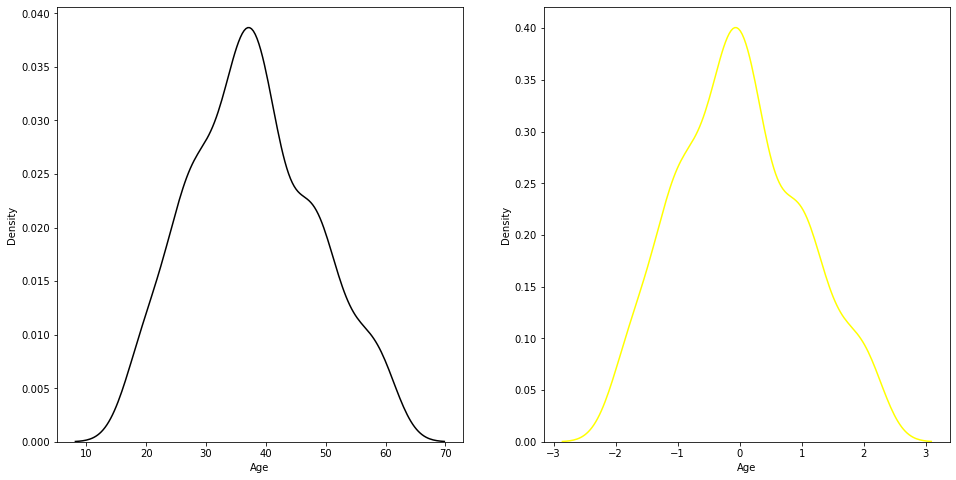

In [73]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(16,8))

sns.kdeplot(x_train['Age'],ax=ax1,color ='black')

sns.kdeplot(x_train_scaled['Age'],ax=ax2,color = 'yellow')

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

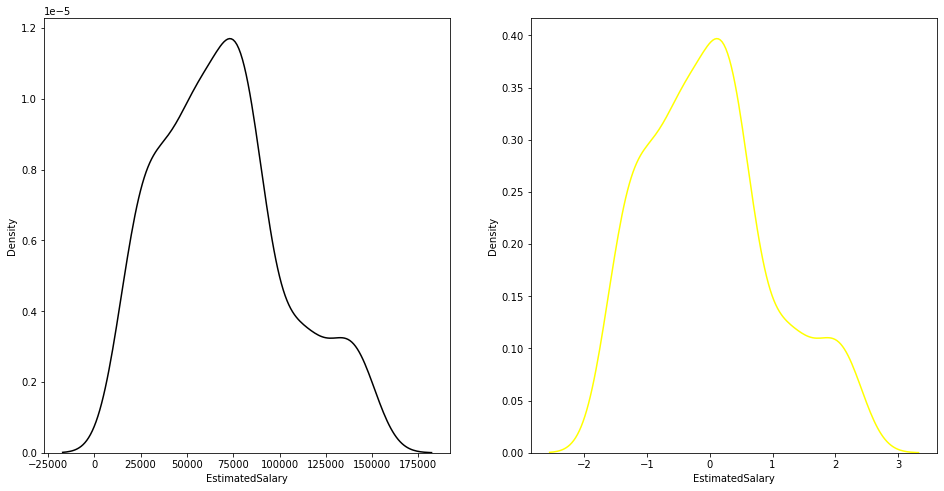

In [81]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(16,8))

sns.kdeplot(x_train['EstimatedSalary'],ax=ax1,color = 'black')

sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2,color='yellow')

## Effect of Scaling on model

In [96]:
lr = LogisticRegression()

lr_scaled = LogisticRegression()

lr.fit(x_train,y_train)

lr_scaled.fit(x_train_scaled,y_train)

y_pred = lr.predict(x_test)

y_pred_scaled = lr_scaled.predict(x_test_scaled)

print(accuracy_score(y_test,y_pred))

print(accuracy_score(y_test,y_pred_scaled))

0.6
0.8125


In [100]:
dt = DecisionTreeClassifier()

dt_scaled = DecisionTreeClassifier()

In [102]:
dt.fit(x_train,y_train)

dt_scaled.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [104]:
y_pred = dt.predict(x_test)

y_pred_scaled = dt_scaled.predict(x_test_scaled)

In [107]:
print(accuracy_score(y_test,y_pred))

print(accuracy_score(y_pred,y_test))

0.8625
0.8625
